# Data Prep

### Data Fetch From Trino


In [1]:
"""
This script establishes a connection to a Presto database via the Trino Python client, 
executes a SQL query to fetch data, and then structures the fetched data into a pandas DataFrame.
The DataFrame is organized with appropriate column names, making the data ready for analysis.
"""

import trino
import pandas as pd
import getpass

# Get password
password = getpass.getpass("Enter your password: ")

# Connect to Trino
conn = trino.dbapi.connect(
    host="presto-gateway.corp.mongodb.com",
    port=443,
    user="jiawei.zhou@mongodb.com",
    catalog="awsdatacatalog",
    http_scheme="https",
    auth=trino.auth.BasicAuthentication("jiawei.zhou@mongodb.com", password),
)

# Execute query
cur = conn.cursor()

/Users/jiawei.zhou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
cur.execute(
    f"""
select
	*
from
	awsdatacatalog.ps_analytics.ps_impact_matching_dataset
"""
)

# Extract column names
columns = [desc[0] for desc in cur.description]

# Fetch rows
rows = cur.fetchall()

# Create DataFrame
df_raw = pd.DataFrame(rows, columns=columns)

In [3]:
# Configure pandas display options for maximum rows and columns

# Set the maximum number of displayed rows
pd.set_option("display.max_rows", 100)  # For example, display up to 100 rows

# Set the maximum number of displayed columns
pd.set_option("display.max_columns", 50)  # For example, display up to 50 columns

In [4]:
# Create a copy of the original DataFrame and display the first few rows.
data = df_raw.copy()

# Display rows
data.head()

,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl
0,a2c6R000004jobJQAQ,0012K00001vGjO9QAK,Atlas NWL,2023-10-16,Splits,393770.74,80106.64,Atlas,2023-10-17,2023-10-26,2023-10-28,2023-10-28,Growth RD,Growth RD,Growth,Growth,Americas,Americas,2023-10-28,2023-10-28,2023-12-13,2024-01-20,None,82502.96,False,False,2202496.0,2017-01-13,Growth,Americas,1
1,a2c6R000003jhVwQAI,0012K00001vGjO9QAK,Atlas NWL,2022-06-28,Splits,0.00,606.34,Atlas,2022-06-28,2022-07-08,2023-01-18,2023-01-18,Growth AE,Growth AE,Growth,Growth,Americas,Americas,None,None,None,None,None,1080.70,True,True,1038211.0,2017-01-13,Growth,Americas,1
2,a2c6R000003h6HjQAI,001A000001J9dDfIAJ,Atlas NWL,2023-07-07,Splits,1210.99,0.00,Atlas,2023-06-26,2023-07-10,2023-07-13,2023-07-13,Product Led Sales Rep,Product Led Sales Rep,Customer Success,Customer Success,Americas,Americas,None,None,None,None,None,14.84,True,False,989.0,2018-06-10,PLS,Americas,1
3,a2c6R000001CmhjQAC,0012K00001fnrpoQAA,Atlas NWL,2022-11-27,Acquisition,11057.21,11249.84,Atlas,2022-11-22,2022-11-28,2022-11-22,2022-11-28,Acq AE,Acq AE,Acquisition,Acquisition,EMEA,EMEA,2023-05-28,2023-07-14,None,None,None,22988.00,False,False,4206.0,2021-12-17,Growth,EMEA,1
4,a2c6R000001CqCkQAK,0012K00001qcg7AQAQ,Atlas NWL,2023-01-31,Acquisition,727.92,14975.72,Atlas,2023-01-31,2023-01-31,2023-03-07,2023-03-07,SD Mgr,SD Mgr,SalesDev,SalesDev,Americas,Americas,2023-05-10,2023-06-08,None,None,None,16286.00,False,False,241.0,2023-03-07,PLS,Americas,1


# Data Profiling


### Duplicate Values

In [5]:
import pandas as pd

# Check for duplicate 'workload_id' values
duplicates = data['workload_id'].duplicated().any()

if duplicates:
    print("There are duplicate workload_id values in the dataset.")
else:
    print("There are no duplicate workload_id values in the dataset.")


There are no duplicate workload_id values in the dataset.


### Null Values

In [6]:
import pandas as pd

# Calculate the total number of workloads (rows in your DataFrame)
total_workloads = data.shape[0]

# Calculate the null values count for each column
null_values = data.isnull().sum()

# Calculate the percentage of null values for each column
null_values_percentage = (null_values / total_workloads) * 100

# Create a DataFrame to display the null values count and percentage
null_values_df = pd.DataFrame({'Null Count': null_values, 'Percentage': null_values_percentage})

# Convert the percentage values to string format with a '%' sign for better readability
null_values_df['Percentage'] = null_values_df['Percentage'].apply(lambda x: f"{x:.2f}%")

# Display rows where the Null Count is greater than 0
filtered_null_values_df = null_values_df[null_values_df['Null Count'] > 0]

# If you want to see the result
filtered_null_values_df


,Null Count,Percentage
workload_owner_team,1,0.02%
workload_current_owner_team,1,0.02%
workload_owner_segment,1,0.02%
workload_current_owner_segment,1,0.02%
workload_owner_area_group,50,0.80%
workload_current_owner_area_group,50,0.80%
workload_6k_run_rate_arr_date,1500,23.94%
workload_12k_run_rate_arr_date,2238,35.72%
workload_25k_run_rate_arr_date,3263,52.07%
workload_50k_run_rate_arr_date,4435,70.78%


In [7]:
import pandas as pd

# Function to calculate null count and percentage for each column in a group
def null_info(group):
    total_workloads = group.shape[0]
    null_counts = group.isnull().sum()
    null_percentage = (null_counts / total_workloads) * 100
    # Creating a DataFrame from the null counts and percentage
    null_df = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentage})
    # Filter to keep only rows where Null Count is greater than 0
    null_df = null_df[null_df['Null Count'] > 0]
    # Optional: Convert the percentage to a more readable format
    null_df['Percentage'] = null_df['Percentage'].apply(lambda x: f"{x:.2f}%")
    return null_df

# Group the data by 'ps_wl' and apply the null_info function to each group
grouped_null_info = data.groupby('ps_wl').apply(null_info)

# Displaying the result
grouped_null_info


Null Count Percentage
ps_wl                                                         
0     workload_owner_area_group                  20      0.73%
      workload_current_owner_area_group          20      0.73%
      workload_6k_run_rate_arr_date             905     32.91%
      workload_12k_run_rate_arr_date           1300     47.27%
      workload_25k_run_rate_arr_date           1769     64.33%
      workload_50k_run_rate_arr_date           2241     81.49%
      workload_100k_run_rate_arr_date          2516     91.49%
      area_group__c                               2      0.07%
1     workload_owner_team                         1      0.03%
      workload_current_owner_team                 1      0.03%
      workload_owner_segment                      1      0.03%
      workload_current_owner_segment              1      0.03%
      workload_owner_area_group                  30      0.85%
      workload_current_owner_area_group          30      0.85%
      workload_6k_run_rate_arr_date             595     16.92%
      workload_12k_run_rate_arr_date            938     26.68%
      workload_25k_run_rate_arr_date           1494     42.49%
      workload_50k_run_rate_arr_date           2194     62.40%
      workload_100k_run_rate_arr_date          2794     79.47%
      area_group__c                               2      0.06%

### 0 Values

In [8]:
# Calculate the number and percentage of workloads with 0 value for all columns
zero_values = (data == 0).sum()
zero_values_percentage = (zero_values / total_workloads) * 100

# Create a DataFrame to display the results
zero_values_df = pd.DataFrame({'Zero Count': zero_values, 'Percentage': zero_values_percentage})
zero_values_df = zero_values_df[(zero_values_df['Zero Count'] > 0) & (zero_values_df['Percentage'] > 0)]
zero_values_df['Percentage'] = zero_values_df['Percentage'].apply(lambda x: f"{x:.2f}%")

zero_values_df


,Zero Count,Percentage
starting_run_rate__c,2075,33.12%
workload_run_rate_fy24_90version,871,13.90%
workload_uses_search,5545,88.49%
workload_uses_device_sync,6121,97.69%
ps_wl,2750,43.89%


In [9]:
import pandas as pd

# Function to calculate zero count and percentage for each column in a group
def zero_info(group):
    total_workloads = group.shape[0]
    zero_counts = (group == 0).sum()
    zero_percentage = (zero_counts / total_workloads) * 100
    # Creating a DataFrame from the zero counts and percentage
    zero_df = pd.DataFrame({'Zero Count': zero_counts, 'Percentage': zero_percentage})
    # Filter to keep only rows where Zero Count is greater than 0
    zero_df = zero_df[zero_df['Zero Count'] > 0]
    # Convert the percentage to a more readable format
    zero_df['Percentage'] = zero_df['Percentage'].apply(lambda x: f"{x:.2f}%")
    return zero_df

# Group the data by 'ps_wl' and apply the zero_info function to each group
grouped_zero_info = data.groupby('ps_wl').apply(zero_info)

# Displaying the result
print(grouped_zero_info)


                                        Zero Count Percentage
ps_wl                                                        
0     starting_run_rate__c                     973     35.38%
      workload_run_rate_fy24_90version         397     14.44%
      workload_uses_search                    2510     91.27%
      workload_uses_device_sync               2692     97.89%
      ps_wl                                   2750    100.00%
1     starting_run_rate__c                    1102     31.34%
      workload_run_rate_fy24_90version         474     13.48%
      workload_uses_search                    3035     86.32%
      workload_uses_device_sync               3429     97.53%


### Distribution

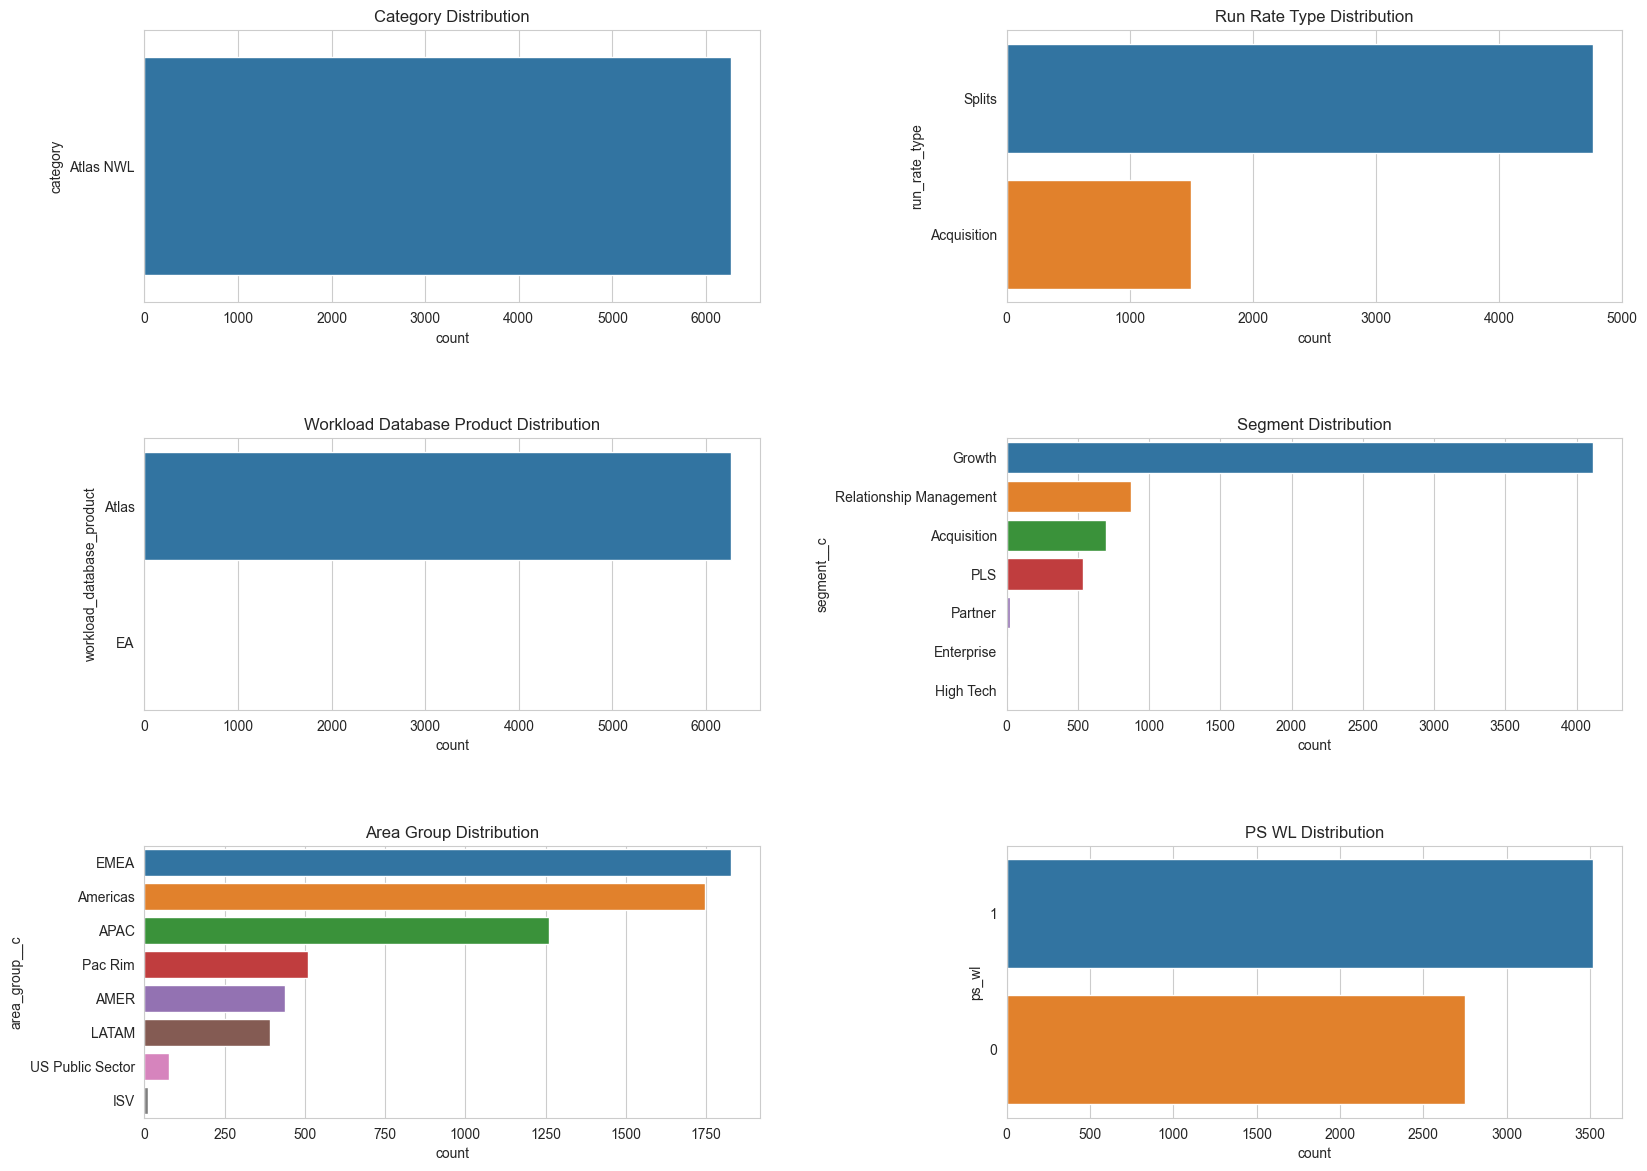

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a function to plot categorical data on a given axis
def plot_categorical_data(ax, column, title, data):
    sns.countplot(y=column, data=data, order=data[column].value_counts().index, ax=ax)
    ax.set_title(title)

# Your categorical columns and titles
categorical_columns = ['category', 'run_rate_type', 'workload_database_product', 'segment__c', 'area_group__c', 'ps_wl']
titles = ['Category Distribution', 'Run Rate Type Distribution', 'Workload Database Product Distribution', 
          'Segment Distribution', 'Area Group Distribution', 'PS WL Distribution']

# Determine the layout of the subplots
n = len(categorical_columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Adjust the figsize to make each plot smaller
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows)) # Adjust figsize here
fig.tight_layout(pad=3.0) # Adjust layout padding if necessary

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categories and titles, plotting on the appropriate subplot
for i, (column, title) in enumerate(zip(categorical_columns, titles)):
    plot_categorical_data(axes[i], column, title, data)

# Hide any unused axes if you have an odd number of plots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Optionally adjust the layout further if needed
plt.subplots_adjust(hspace=0.5, wspace=0.4) # Adjust horizontal and vertical spacing

plt.show()


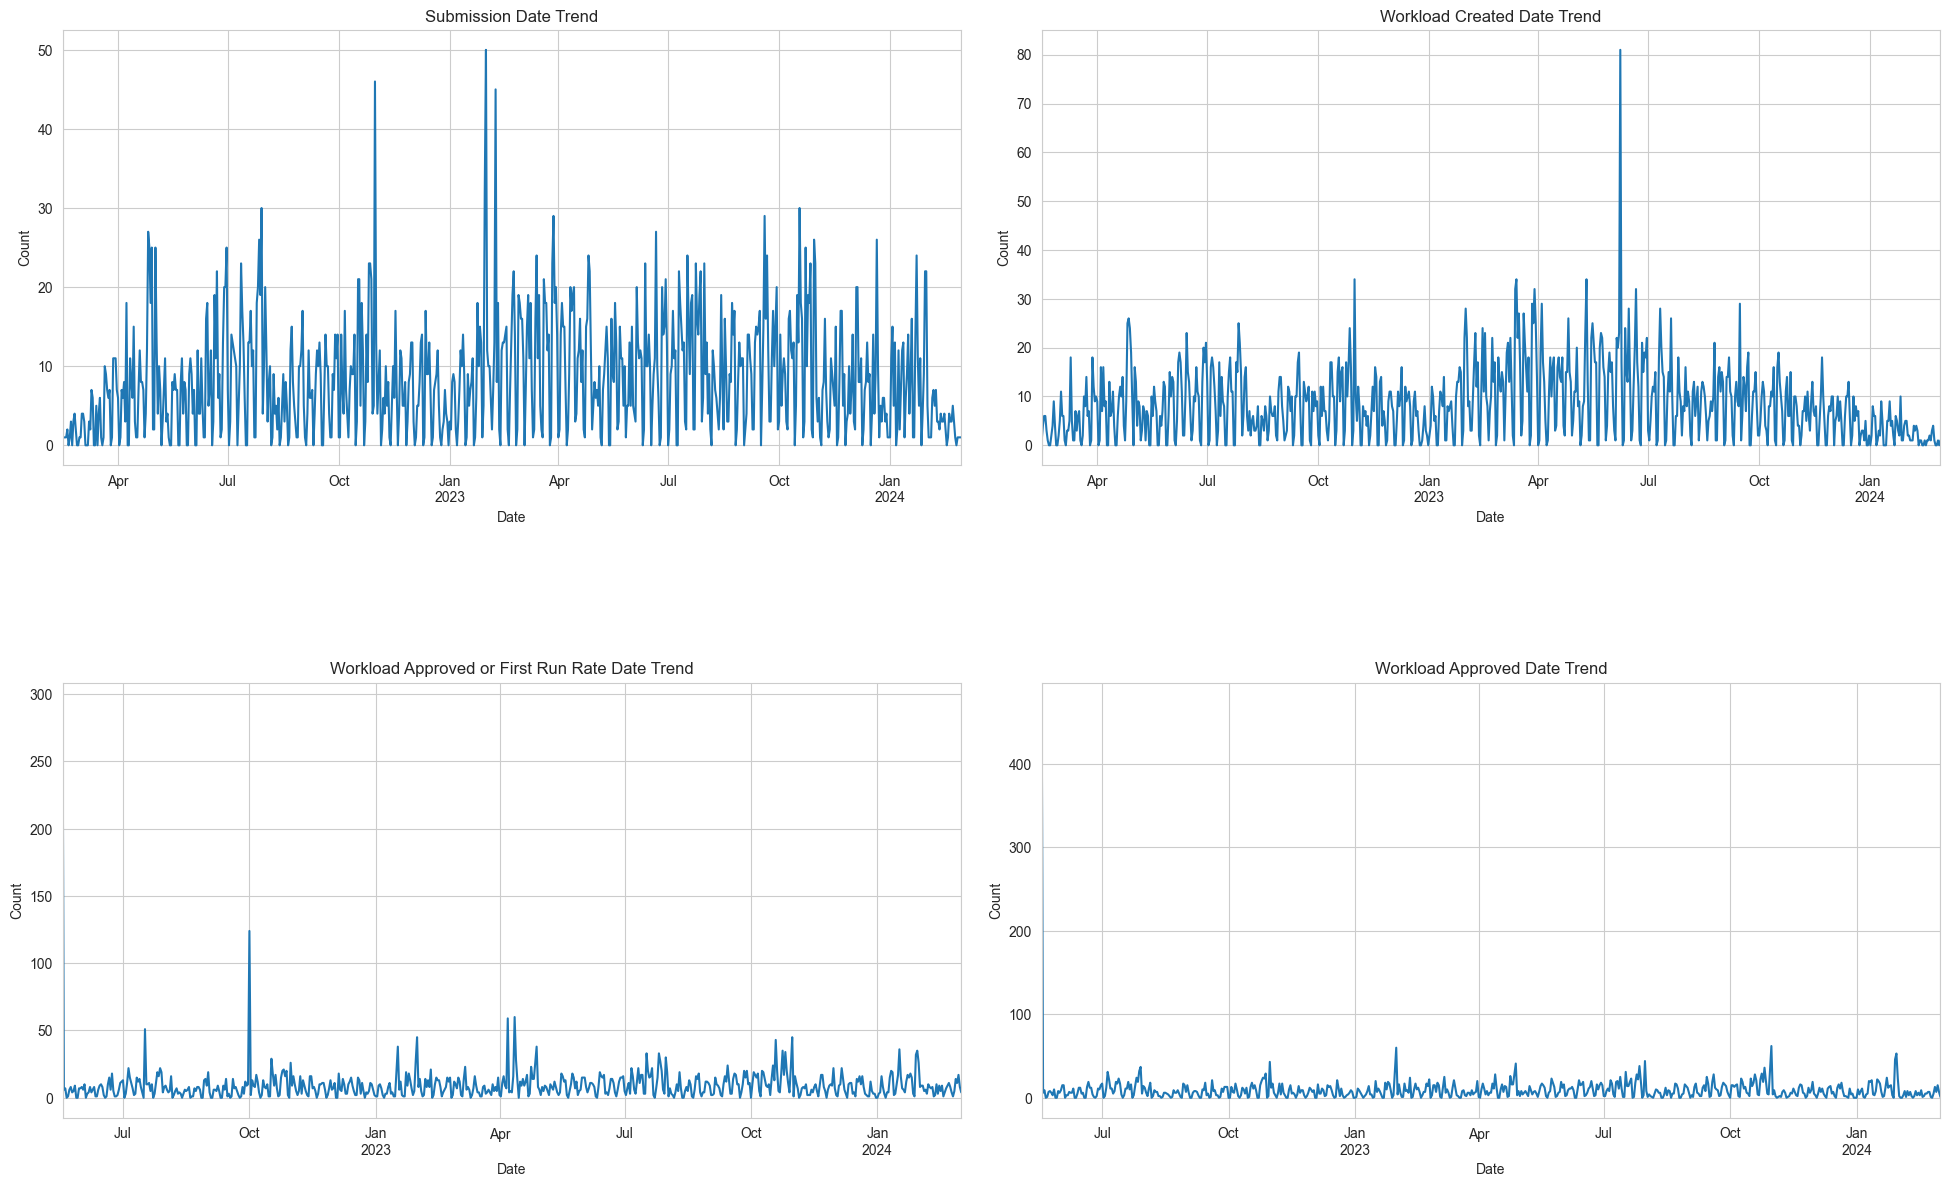

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to plot time series data on a given axis
def plot_time_series_data(ax, column, title, data):
    # Convert the column to datetime and set it as the index
    temp_data = data.copy()
    temp_data[column] = pd.to_datetime(temp_data[column])
    temp_data.set_index(column, inplace=True)
    
    # Now resample and plot
    temp_data.resample('D').size().plot(ax=ax)  # Use size() for counting
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')


# Your time series columns and titles, including 'workload_approved_date'
time_series_columns = [
    'submission_date', 
    'workload_created_date', 
    'workload_approved_or_first_run_rate_arr_date',
    'workload_approved_date' 
]
titles = [
    'Submission Date Trend', 
    'Workload Created Date Trend', 
    'Workload Approved or First Run Rate Date Trend',
    'Workload Approved Date Trend'
]

# Determine the layout of the subplots
n = len(time_series_columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categories and titles, plotting on the appropriate subplot
for i, (column, title) in enumerate(zip(time_series_columns, titles)):
    plot_time_series_data(axes[i], column, title, data)

# Hide any unused axes if you have an odd number of plots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent title and y-axis label overlap
plt.subplots_adjust(hspace=0.5)  # Increase hspace if titles still overlap

plt.show()


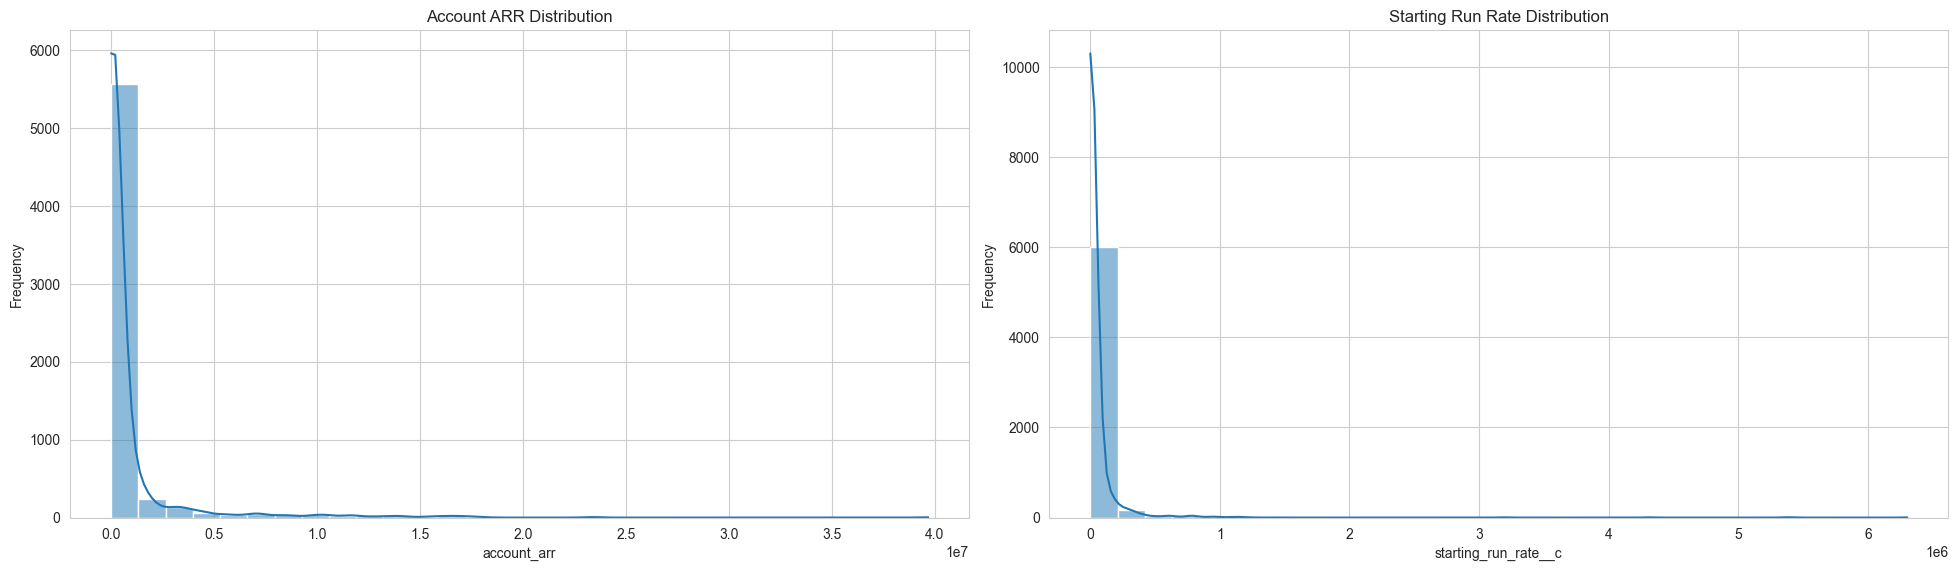

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to plot numerical data on a given axis
def plot_numerical_data(ax, column, title, bins=30):
    sns.histplot(data[column], bins=bins, kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Your numerical columns and titles
numerical_columns = ['account_arr', 'starting_run_rate__c']
titles = ['Account ARR Distribution', 'Starting Run Rate Distribution']

# Determine the layout of the subplots
n = len(numerical_columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 6 * nrows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the categories and titles, plotting on the appropriate subplot
for i, (column, title) in enumerate(zip(numerical_columns, titles)):
    plot_numerical_data(axes[i], column, title)

# Hide any unused axes if you have an odd number of plots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to improve spacing and prevent overlap
plt.subplots_adjust(hspace=0.5)  # Adjust if necessary

plt.show()

## Matching

### Matching Approach #1 - Exact Matching: control --> treatment

In [13]:
from datetime import timedelta
import pandas as pd

# Convert 'workload_created_date' to datetime
data['workload_created_date'] = pd.to_datetime(data['workload_created_date'])

# Add a new column 'group' to classify each row as 'treatment' or 'control'
data['group'] = data['ps_wl'].map({1: 'treatment', 0: 'control'})

# Separate into treatment and control groups based on the new 'group' column
treatment_group = data[data['group'] == 'treatment']
control_group = data[data['group'] == 'control']

# Initialize a list to keep track of matches
matches = []

# Iterate over each row in the treatment group to find its match
for index, treatment_row in treatment_group.iterrows():
    # Filter control group based on 'category', 'workload_database_product', 'segment__c'
    potential_matches = control_group[
        (control_group['category'] == treatment_row['category']) &
        (control_group['workload_database_product'] == treatment_row['workload_database_product']) &
        (control_group['segment__c'] == treatment_row['segment__c'])
    ]
    
    # Narrow down potential matches within ±30 days of 'workload_created_date'
    potential_matches = potential_matches[
        abs(potential_matches['workload_created_date'] - treatment_row['workload_created_date']) <= timedelta(days=30)
    ]
    
    # If there are potential matches, find the one with the closest 'account_arr' to the treatment row
    if not potential_matches.empty:
        potential_matches['arr_diff'] = abs(potential_matches['account_arr'] - treatment_row['account_arr'])
        best_match = potential_matches.loc[potential_matches['arr_diff'].idxmin()]
        
        # Append both the treatment row and its match to the list of matches
        matches.append({**treatment_row.to_dict(), 'match_group': 'treatment'})
        matches.append({**best_match.to_dict(), 'match_group': 'control'})

# Convert the list of matches into a DataFrame
combined_dataset = pd.DataFrame(matches)

# Display the structure of the matches DataFrame
combined_dataset.head()


,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl,group,match_group,arr_diff
0,a2c6R000004jobJQAQ,0012K00001vGjO9QAK,Atlas NWL,2023-10-16,Splits,393770.74,80106.64,Atlas,2023-10-17,2023-10-26,2023-10-28,2023-10-28,Growth RD,Growth RD,Growth,Growth,Americas,Americas,2023-10-28,2023-10-28,2023-12-13,2024-01-20,None,82502.96,False,False,2202496.0,2017-01-13,Growth,Americas,1,treatment,treatment,NaN
1,a2c6R000004pvhNQAQ,001A000000zWwHbIAK,Atlas NWL,2023-11-23,Splits,0.00,2922.33,Atlas,2023-10-23,2023-12-13,2023-12-17,2023-12-17,Growth AE,Growth AE,Growth,Growth,EMEA,EMEA,None,None,None,None,None,2875.02,False,False,1283413.0,2015-11-16,Growth,EMEA,0,control,control,919083.0
2,a2c6R000003jhVwQAI,0012K00001vGjO9QAK,Atlas NWL,2022-06-28,Splits,0.00,606.34,Atlas,2022-06-28,2022-07-08,2023-01-18,2023-01-18,Growth AE,Growth AE,Growth,Growth,Americas,Americas,None,None,None,None,None,1080.70,True,True,1038211.0,2017-01-13,Growth,Americas,1,treatment,treatment,NaN
3,a2c6R000003jhS4QAI,001A000000p4tv2IAA,Atlas NWL,2022-06-28,Splits,247982.79,0.00,Atlas,2022-06-27,2022-07-07,2022-06-27,2022-07-07,Growth AE,Growth AE,Growth,Growth,Americas,Americas,2023-04-07,2023-04-11,2023-04-29,None,None,25721.70,False,False,720274.0,2017-07-23,Growth,Americas,0,control,control,317937.0
4,a2c6R000003h6HjQAI,001A000001J9dDfIAJ,Atlas NWL,2023-07-07,Splits,1210.99,0.00,Atlas,2023-06-26,2023-07-10,2023-07-13,2023-07-13,Product Led Sales Rep,Product Led Sales Rep,Customer Success,Customer Success,Americas,Americas,None,None,None,None,None,14.84,True,False,989.0,2018-06-10,PLS,Americas,1,treatment,treatment,NaN


In [14]:
combined_dataset[['workload_id', 'group']].to_csv('exact_match_result.csv', index=False)

#### Balance Check

In [15]:
# Count the number of instances in each group
group_counts = combined_dataset['group'].value_counts()

# Print the counts
print("Number of workloads in each group:")
print(group_counts)

Number of workloads in each group:
group
treatment    3508
control      3508
Name: count, dtype: int64


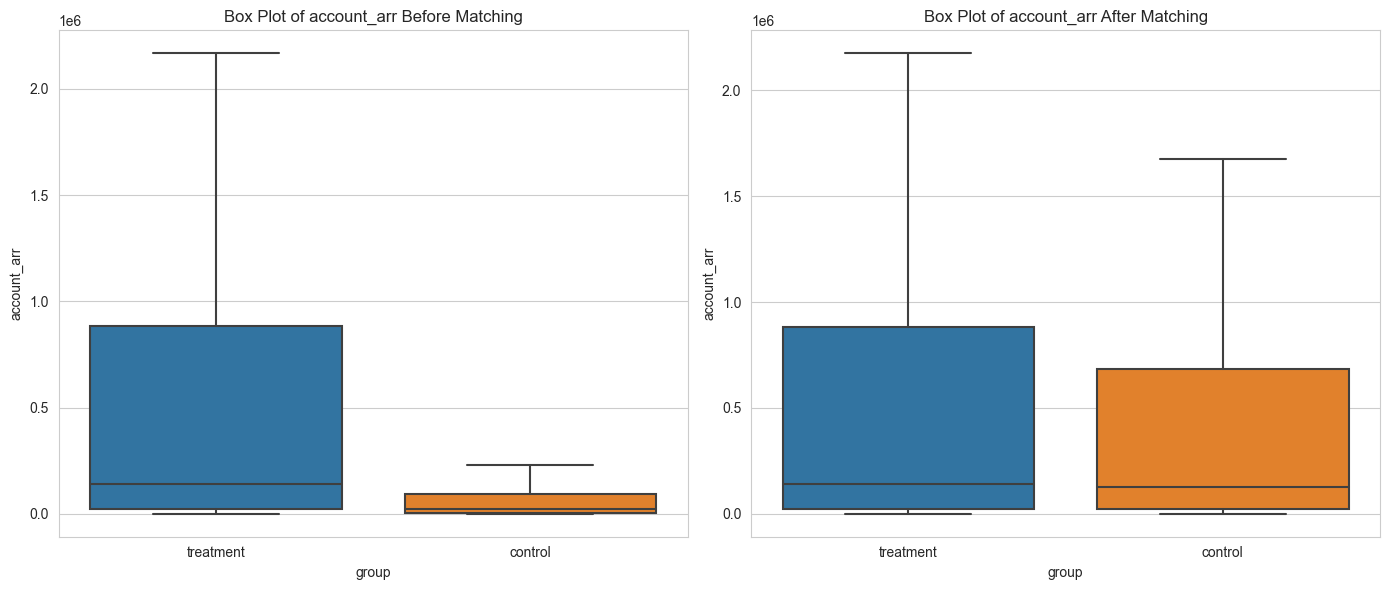

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the order of groups explicitly
group_order = ['treatment', 'control']

# Box plot for continuous variable before matching
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='account_arr', data=data, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr Before Matching')

# Box plot for continuous variable after matching
plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='account_arr', data=combined_dataset, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr After Matching')

plt.tight_layout()
plt.show()


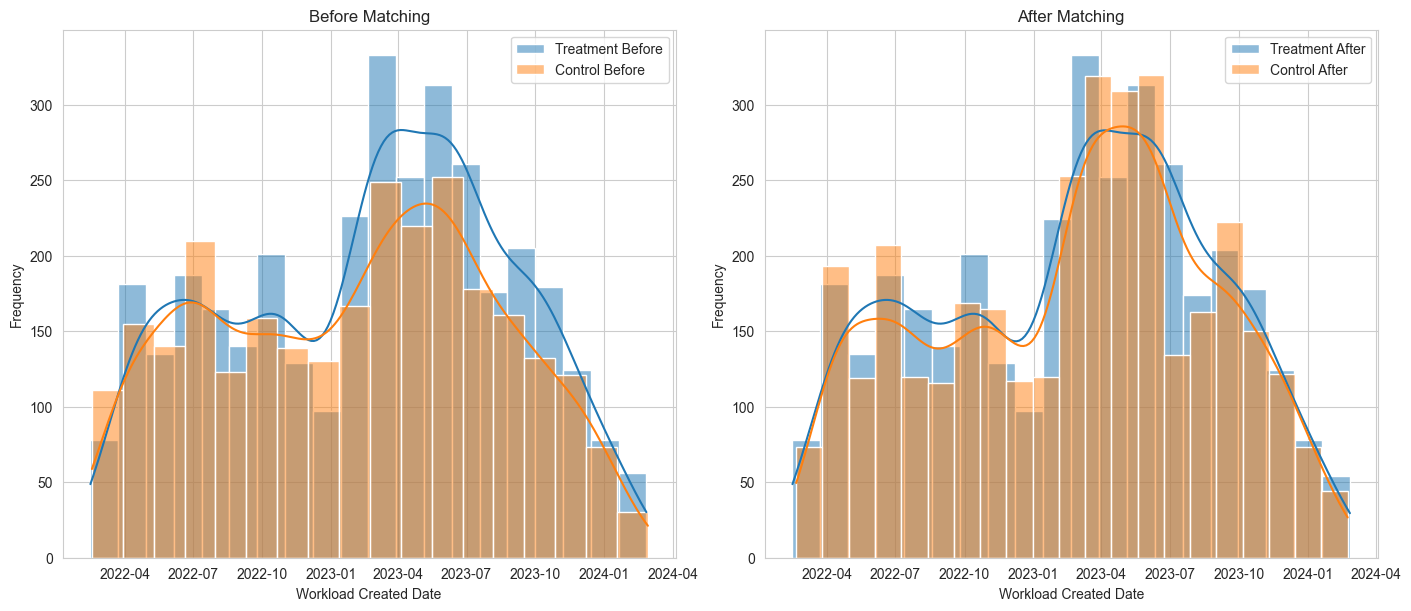

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined distributions with default colors
def plot_combined_distributions(data, combined_dataset):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True)
    
    # Plotting before matching
    sns.histplot(data[data['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[0], label='Treatment Before')
    sns.histplot(data[data['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[0], label='Control Before')
    axs[0].set_title('Before Matching')
    
    # Plotting after matching
    sns.histplot(combined_dataset[combined_dataset['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[1], label='Treatment After')
    sns.histplot(combined_dataset[combined_dataset['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[1], label='Control After')
    axs[1].set_title('After Matching')
    
    # Setting labels and legends for both plots
    for ax in axs:
        ax.set_xlabel('Workload Created Date')
        ax.set_ylabel('Frequency')
        ax.legend()

plot_combined_distributions(data, combined_dataset)
plt.show()


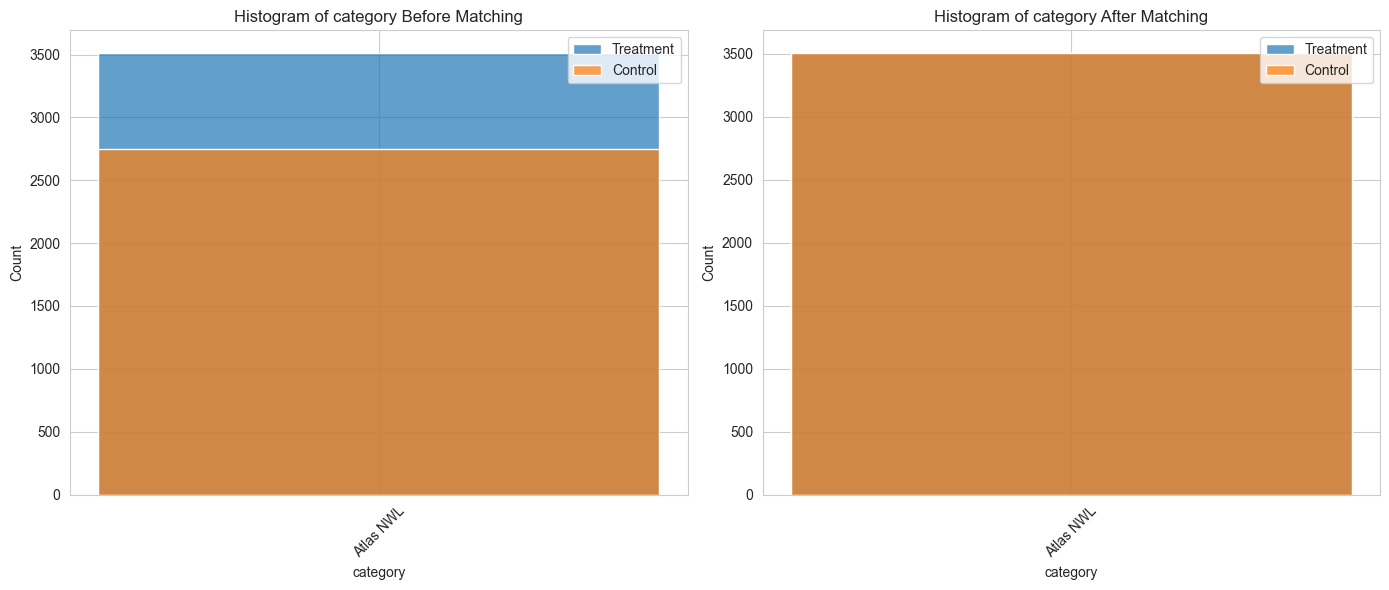

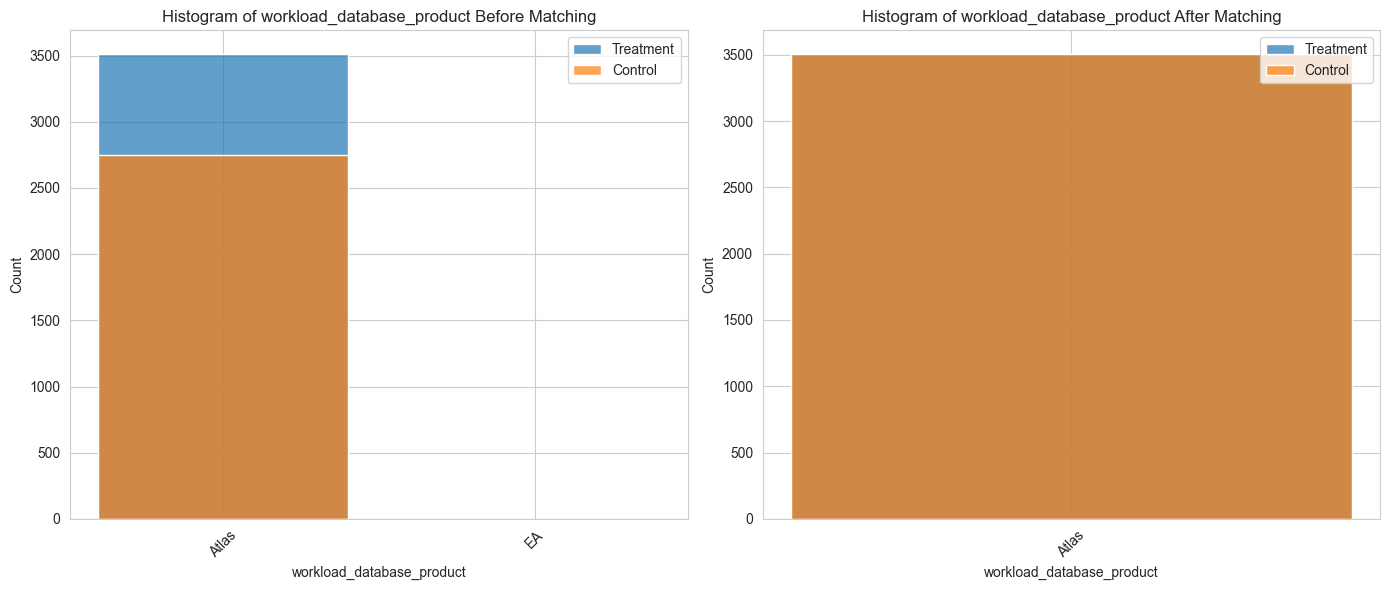

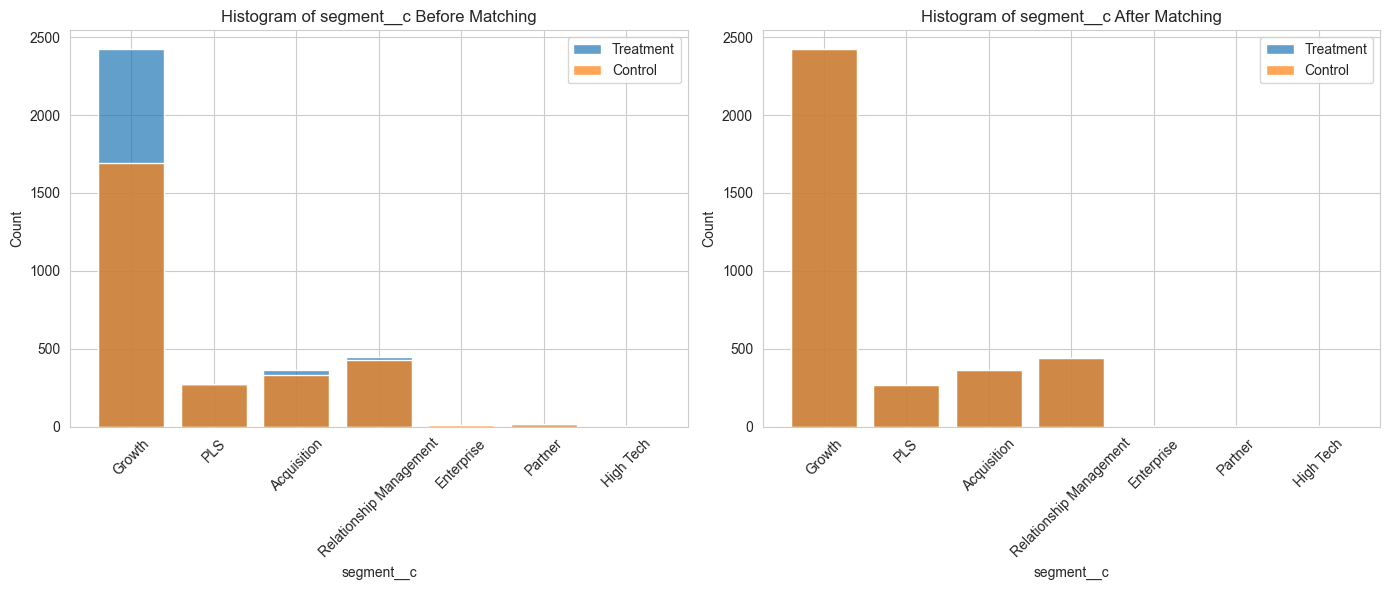

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the list of categorical variables for the demonstration
categorical_vars = ['category', 'workload_database_product', 'segment__c']

# Create histograms for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(14, 6))

    # Before matching
    plt.subplot(1, 2, 1)
    sns.histplot(data=data[data['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(data=data[data['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} Before Matching')
    plt.xticks(rotation=45)
    plt.legend()

    # After matching
    plt.subplot(1, 2, 2)
    sns.histplot(combined_dataset[combined_dataset['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(combined_dataset[combined_dataset['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} After Matching')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()


### Matching Approach #2 - Exact Matching: treatment --> control

In [52]:
# from datetime import timedelta
# import pandas as pd

# # Assuming 'df_raw' is your original DataFrame
# data = df_raw.copy()

# # Convert 'workload_created_date' to datetime
# data['workload_created_date'] = pd.to_datetime(data['workload_created_date'])

# # Add a new column 'group' to classify each row as 'treatment' or 'control'
# data['group'] = data['ps_wl'].map({1: 'treatment', 0: 'control'})

# # Separate into treatment and control groups based on the new 'group' column
# treatment_group = data[data['group'] == 'treatment']
# control_group = data[data['group'] == 'control']

# # Initialize a list to keep track of matches
# matches = []

# # Iterate over each row in the control group to find its match in the treatment group
# for index, control_row in control_group.iterrows():
#     # Filter treatment group based on 'category', 'workload_database_product', 'segment__c'
#     potential_matches = treatment_group[
#         (treatment_group['category'] == control_row['category']) &
#         (treatment_group['workload_database_product'] == control_row['workload_database_product']) &
#         (treatment_group['segment__c'] == control_row['segment__c'])
#     ]
    
#     # Narrow down potential matches within ±30 days of 'workload_created_date'
#     potential_matches = potential_matches[
#         abs(potential_matches['workload_created_date'] - control_row['workload_created_date']) <= timedelta(days=30)
#     ]
    
#     # If there are potential matches, find the one with the closest 'account_arr' to the control row
#     if not potential_matches.empty:
#         potential_matches['arr_diff'] = abs(potential_matches['account_arr'] - control_row['account_arr'])
#         best_match = potential_matches.loc[potential_matches['arr_diff'].idxmin()]
        
#         # Append both the control row and its match to the list of matches
#         matches.append({**control_row.to_dict(), 'match_group': 'control'})
#         matches.append({**best_match.to_dict(), 'match_group': 'treatment'})

# # Convert the list of matches into a DataFrame
# combined_dataset = pd.DataFrame(matches)

          workload_id          account_id   category submission_date  \
0  a2c6R000003h5TtQAI  001A000001KMqeWIAT  Atlas NWL      2023-06-21   
1  a2c6R000003h22GQAQ  001A000001OUrkfIAD  Atlas NWL      2023-10-30   
2  a2c6R000000xUKwQAM  0016R00003BdwvWQAR  Atlas NWL      2022-07-25   
3  a2c6R000003jlRXQAY  0012K00001kPnM1QAK  Atlas NWL      2022-07-13   
4  a2c6R000001CsvSQAS  0016R00003FRrO8QAL  Atlas NWL      2023-03-07   

  run_rate_type  starting_run_rate__c  workload_run_rate_fy24_90version  \
0        Splits              18351.86                           2777.44   
1        Splits                 93.90                            458.76   
2   Acquisition                  0.00                            836.62   
3   Acquisition                799.80                              0.00   
4   Acquisition                  0.00                          40260.03   

  workload_database_product workload_created_date workload_approved_date  \
0                     Atlas            2

In [75]:
from datetime import timedelta
import pandas as pd
import numpy as np

# Assuming 'df_raw' is your original DataFrame
data = df_raw.copy()

# Convert 'workload_created_date' to datetime
data['workload_created_date'] = pd.to_datetime(data['workload_created_date'])

# Add a new column 'group' to classify each row as 'treatment' or 'control'
data['group'] = data['ps_wl'].map({1: 'treatment', 0: 'control'})

# Remove outliers in 'account_arr'
Q1 = data['account_arr'].quantile(0.25)
Q3 = data['account_arr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['account_arr'] >= lower_bound) & (data['account_arr'] <= upper_bound)]

# Separate into treatment and control groups
treatment_group = data[data['group'] == 'treatment']
control_group = data[data['group'] == 'control'].copy()  # Create a copy for safe removal

matches = []

for index, control_row in control_group.iterrows():
    potential_matches = treatment_group[
        (treatment_group['category'] == control_row['category']) &
        (treatment_group['workload_database_product'] == control_row['workload_database_product']) &
        (treatment_group['segment__c'] == control_row['segment__c']) &
        (abs(treatment_group['workload_created_date'] - control_row['workload_created_date']) <= timedelta(days=30))
    ].copy()  # Create a copy to avoid SettingWithCopyWarning
    
    # Now that potential_matches is a copy, we can safely modify it
    if not potential_matches.empty:
        potential_matches['arr_diff'] = abs(potential_matches['account_arr'] - control_row['account_arr'])
        best_match_index = potential_matches['arr_diff'].idxmin()
        best_match = potential_matches.loc[best_match_index]
        
        # Append both the control row and its match to the list of matches
        matches.append({**control_row.to_dict(), 'match_group': 'control'})
        matches.append({**best_match.to_dict(), 'match_group': 'treatment'})
        
        # Remove the matched treatment unit to ensure no replacement
        treatment_group = treatment_group.drop(best_match_index)

# Convert the list of matches into a DataFrame
combined_dataset = pd.DataFrame(matches)

In [76]:
combined_dataset[['workload_id', 'group']].to_csv('exact_match_result.csv', index=False)

#### Balance Check

In [77]:
combined_dataset.head()

,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl,group,match_group,arr_diff
0,a2c6R000003h5TtQAI,001A000001KMqeWIAT,Atlas NWL,2023-06-21,Splits,18351.86,2777.44,Atlas,2023-06-21,2023-07-07,2023-07-03,2023-07-07,Product Led Sales Rep,Product Led Sales Rep,Customer Success,Customer Success,EMEA,EMEA,2024-02-22,None,None,None,None,6472.54,False,True,38129.0,2019-05-21,Growth,EMEA,0,control,control,NaN
1,a2c6R000003h22GQAQ,001A000001OUrkfIAD,Atlas NWL,2023-10-30,Splits,93.90,458.76,Atlas,2023-06-02,2023-12-15,2024-02-24,2024-02-24,Growth AE,Growth AE,Growth,Growth,Americas,Americas,None,None,None,None,None,951.48,False,False,38036.0,2022-07-15,Growth,Americas,1,treatment,treatment,93.0
2,a2c6R000000xUKwQAM,0016R00003BdwvWQAR,Atlas NWL,2022-07-25,Acquisition,0.00,836.62,Atlas,2022-07-25,2022-07-25,2022-07-25,2022-07-25,Acq AE,Acq AE,Acquisition,Acquisition,LATAM,LATAM,None,None,None,None,None,1409.59,False,False,576.0,2022-07-22,Relationship Management,AMER,0,control,control,NaN
3,a2c6R000003jlRXQAY,0012K00001kPnM1QAK,Atlas NWL,2022-07-13,Acquisition,799.80,0.00,Atlas,2022-07-13,2022-07-22,2023-04-12,2023-04-12,Acq AE,Acq AE,Acquisition,Acquisition,EMEA,EMEA,None,None,None,None,None,781.26,False,False,782.0,2022-08-16,Relationship Management,EMEA,1,treatment,treatment,206.0
4,a2c6R000001CsvSQAS,0016R00003FRrO8QAL,Atlas NWL,2023-03-07,Acquisition,0.00,40260.03,Atlas,2023-03-07,2023-03-21,2023-03-07,2023-03-21,Acq AE,Acq AE,APAC,APAC,APAC,APAC,2023-04-12,2023-05-10,2023-08-10,2024-02-03,None,54779.00,False,False,13823.0,2019-09-29,Growth,APAC,0,control,control,NaN


In [78]:
# Count the total number of workloads in each group
total_group_counts = combined_dataset['group'].value_counts()

# Count the unique number of workloads in each group
unique_group_counts = combined_dataset.drop_duplicates(subset=['workload_id'])['group'].value_counts()

# Print the total counts
print("Total number of workloads in each group:")
print(total_group_counts)

# Print the unique counts
print("\nUnique number of workloads in each group:")
print(unique_group_counts)


Total number of workloads in each group:
group
control      2285
treatment    2285
Name: count, dtype: int64

Unique number of workloads in each group:
group
control      2285
treatment    2285
Name: count, dtype: int64


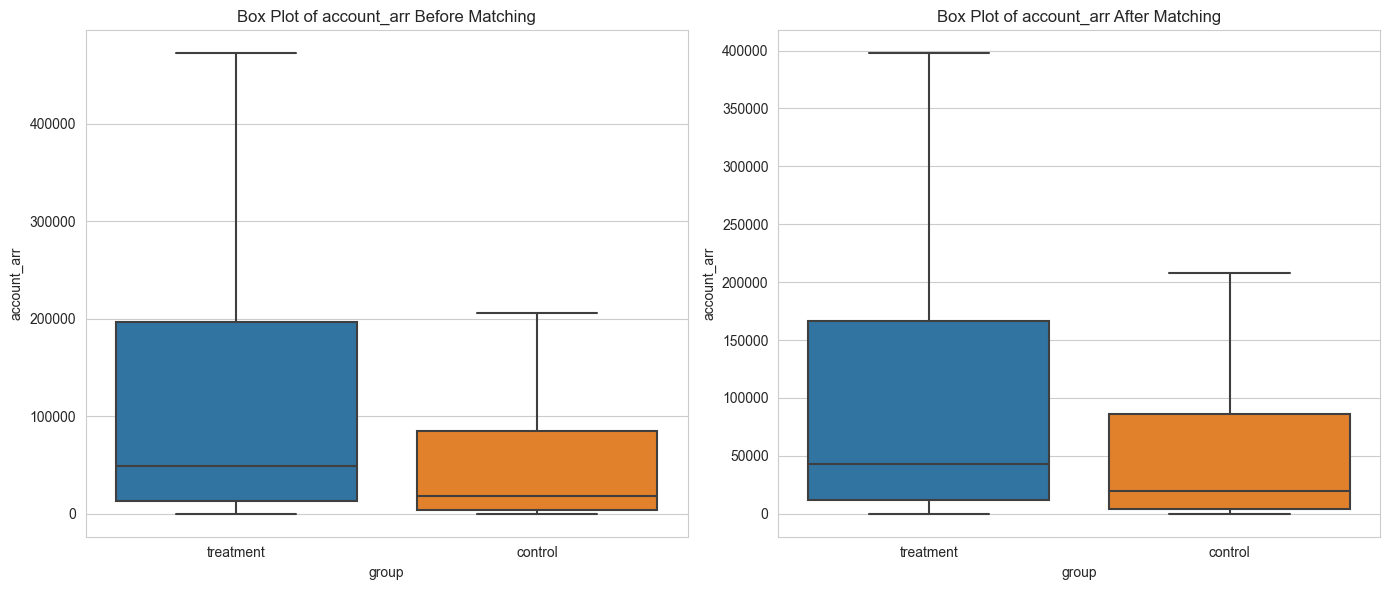

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the order of groups explicitly
group_order = ['treatment', 'control']

# Box plot for continuous variable before matching
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='account_arr', data=data, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr Before Matching')

# Box plot for continuous variable after matching
plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='account_arr', data=combined_dataset, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr After Matching')

plt.tight_layout()
plt.show()


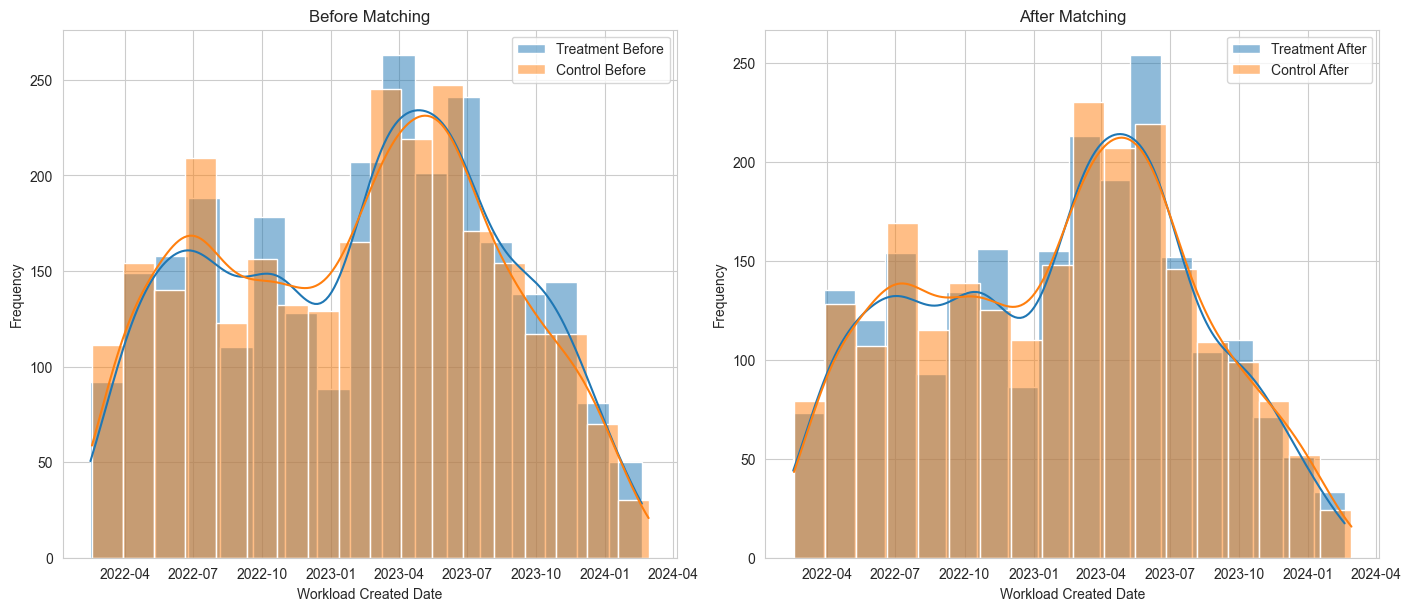

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined distributions with default colors
def plot_combined_distributions(data, combined_dataset):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True)
    
    # Plotting before matching
    sns.histplot(data[data['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[0], label='Treatment Before')
    sns.histplot(data[data['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[0], label='Control Before')
    axs[0].set_title('Before Matching')
    
    # Plotting after matching
    sns.histplot(combined_dataset[combined_dataset['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[1], label='Treatment After')
    sns.histplot(combined_dataset[combined_dataset['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[1], label='Control After')
    axs[1].set_title('After Matching')
    
    # Setting labels and legends for both plots
    for ax in axs:
        ax.set_xlabel('Workload Created Date')
        ax.set_ylabel('Frequency')
        ax.legend()

plot_combined_distributions(data, combined_dataset)
plt.show()


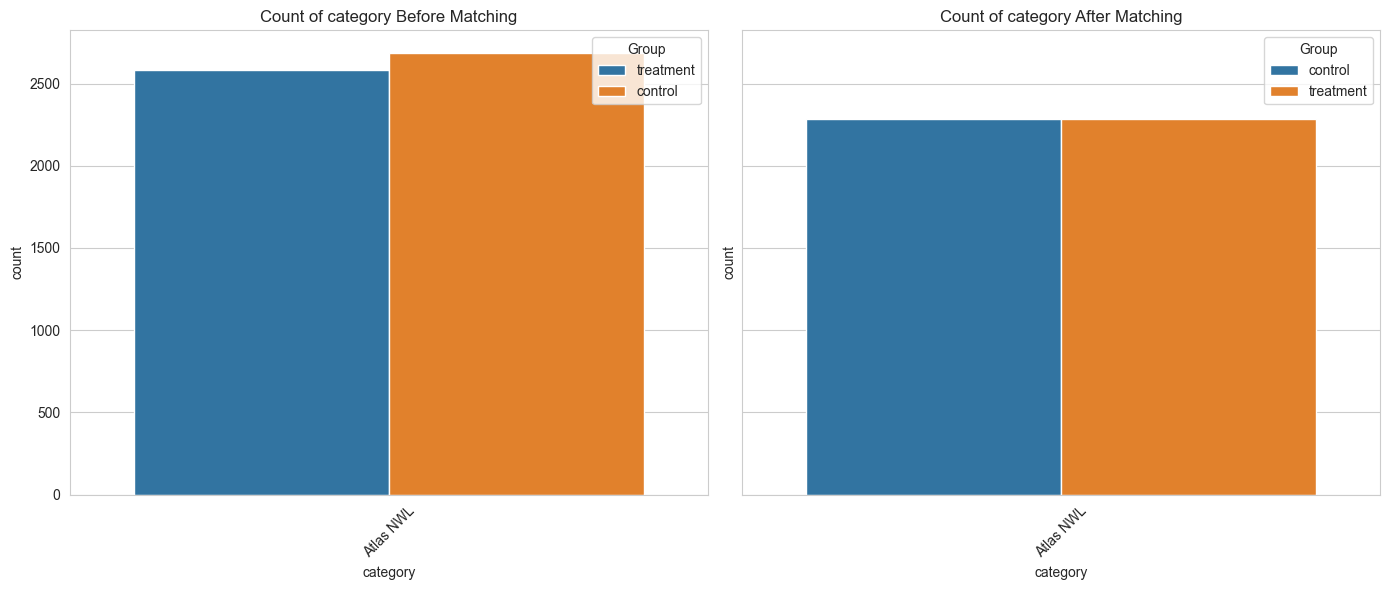

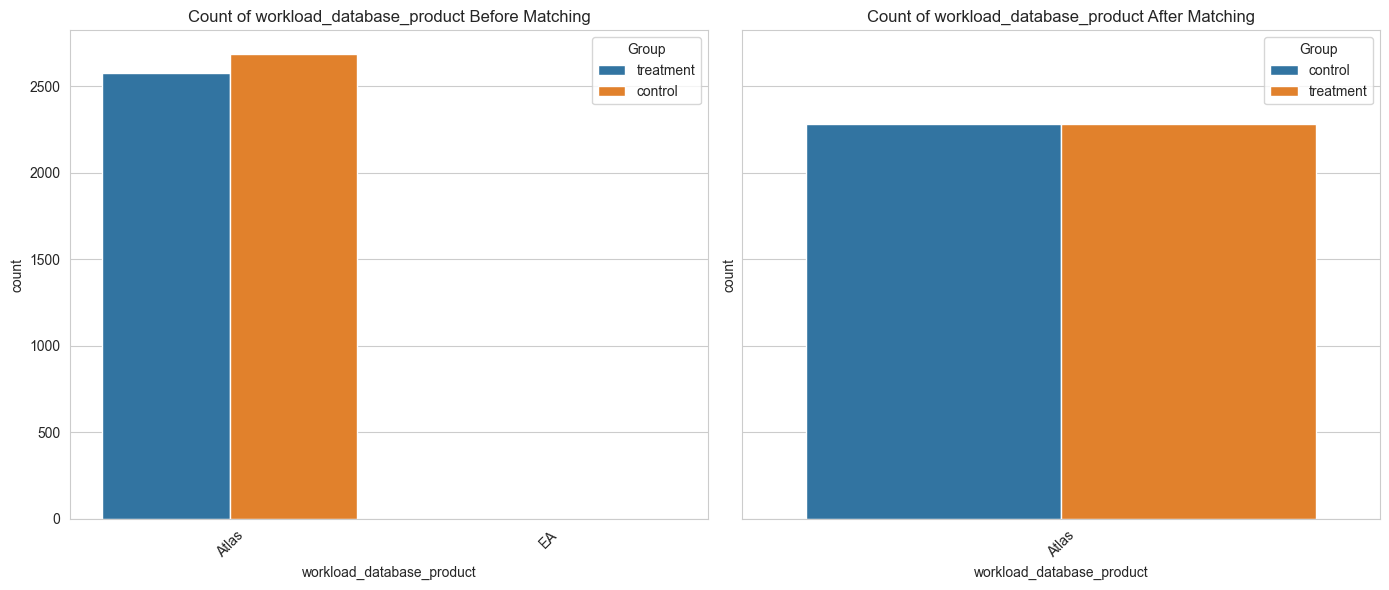

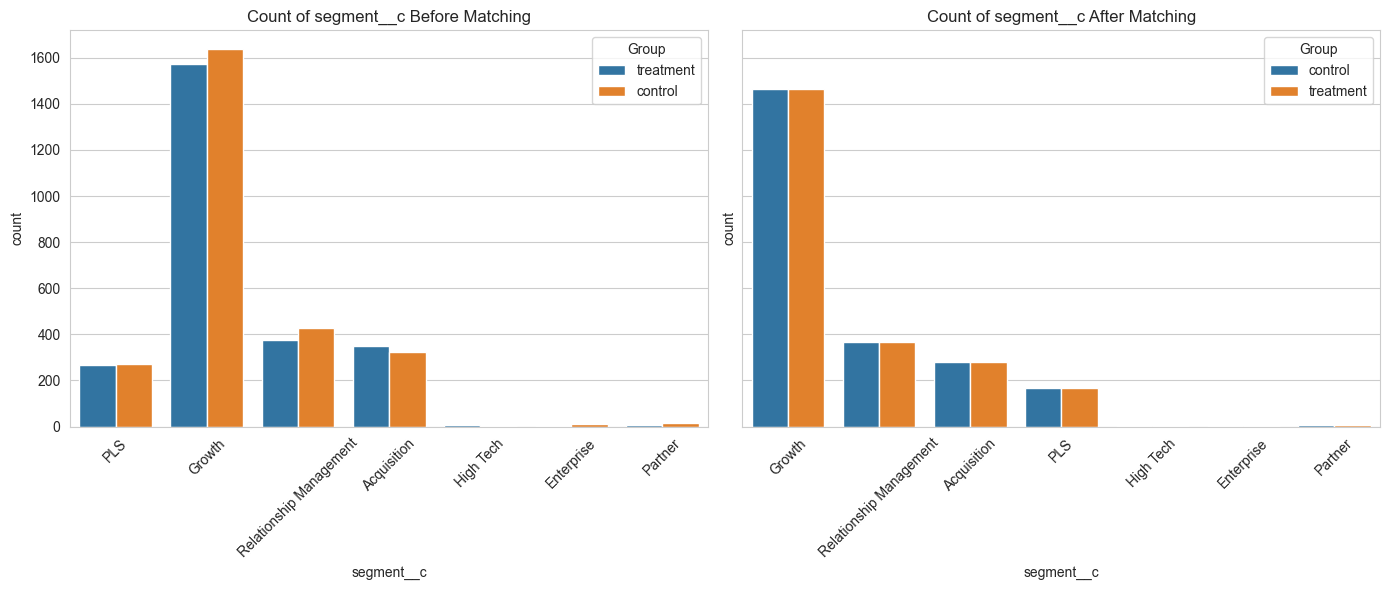

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style for better visuals
sns.set_style('whitegrid')

# Assuming 'data' is your DataFrame and 'combined_dataset' is the DataFrame after matching

# Define the list of categorical variables for the demonstration
categorical_vars = ['category', 'workload_database_product', 'segment__c']

# Create side-by-side bar charts for each categorical variable
for var in categorical_vars:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Share the y-axis to make comparisons easier

    # Before matching
    ax[0] = sns.countplot(data=data, x=var, hue='group', ax=ax[0], dodge=True)
    ax[0].set_title(f'Count of {var} Before Matching')
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].legend(title='Group')

    # After matching
    ax[1] = sns.countplot(data=combined_dataset, x=var, hue='group', ax=ax[1], dodge=True)
    ax[1].set_title(f'Count of {var} After Matching')
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].legend(title='Group')

    plt.tight_layout()
    plt.show()


### Matching Approach #3 - Propensity Score Matching

In [25]:
# Create a copy of the original DataFrame and display the first few rows.
data = df_raw.copy()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.neighbors import NearestNeighbors

# Convert 'workload_created_date' to datetime format
data['workload_created_date'] = pd.to_datetime(data['workload_created_date'])

# Set the reference date and calculate the number of days since the reference date
reference_date = pd.to_datetime('2022-01-01')
data['days_since_2022_01_01'] = (data['workload_created_date'] - reference_date).dt.days

# Encode categorical variables
categorical_columns = ['category', 'run_rate_type', 'workload_database_product', 'segment__c', 'area_group__c']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))

# Use 'account_arr' directly without applying an artificial weight
data['account_arr'] = data['account_arr']  # This line is actually redundant and is shown for clarity. You can use 'account_arr' directly in 'model_columns'.

# Add or update group information based on 'ps_wl'
data['group'] = data['ps_wl'].apply(lambda x: 'treatment' if x == 1 else 'control')

# Update 'model_columns' to include the original 'account_arr' without scaling
model_columns = ['category', 'run_rate_type', 'workload_database_product', 'days_since_2022_01_01', 'account_arr', 'segment__c', 'area_group__c']

# Prepare the features (X) and the target variable (y)
X = data[model_columns]
y = data['ps_wl']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized features and the target variable into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict propensity scores for the entire dataset with the standardized features
data['propensity_score'] = xgb_model.predict_proba(scaler.transform(X))[:, 1]

# Proceed with the treatment and control group processing and matching
treatment = data[data['ps_wl'] == 1].copy()
control = data[data['ps_wl'] == 0].copy()

# Fit NearestNeighbors model on control group's propensity scores
nn = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(control[['propensity_score']])

# Find nearest neighbor in control for each treatment
_, nearest_indices = nn.kneighbors(treatment[['propensity_score']])

# Add the matched control index to the treatment DataFrame
treatment['matched_control_index'] = nearest_indices.flatten()

# Assign a unique pair index to each treatment instance
treatment['pair_index'] = range(1, len(treatment) + 1)

# Prepare the control matches with their pair indices
matched_controls = control.iloc[treatment['matched_control_index']].copy()
matched_controls['pair_index'] = treatment['pair_index'].values

# Combine treatment and matched control instances without duplicating 'group' column
matched_pairs = pd.concat([treatment, matched_controls]).reset_index(drop=True)

# Display the structure of the matches DataFrame
matched_pairs.head()

,workload_id,account_id,category,submission_date,run_rate_type,starting_run_rate__c,workload_run_rate_fy24_90version,workload_database_product,workload_created_date,workload_approved_date,workload_first_run_rate_arr_date,workload_approved_or_first_run_rate_arr_date,workload_owner_team,workload_current_owner_team,workload_owner_segment,workload_current_owner_segment,workload_owner_area_group,workload_current_owner_area_group,workload_6k_run_rate_arr_date,workload_12k_run_rate_arr_date,workload_25k_run_rate_arr_date,workload_50k_run_rate_arr_date,workload_100k_run_rate_arr_date,workload_maximum_run_rate_arr,workload_uses_search,workload_uses_device_sync,account_arr,first_arr_date,segment__c,area_group__c,ps_wl,days_since_2022_01_01,group,propensity_score,matched_control_index,pair_index
0,a2c6R000004jobJQAQ,0012K00001vGjO9QAK,0,2023-10-16,1,393770.74,80106.64,0,2023-10-17,2023-10-26,2023-10-28,2023-10-28,Growth RD,Growth RD,Growth,Growth,Americas,Americas,2023-10-28,2023-10-28,2023-12-13,2024-01-20,None,82502.96,False,False,2202496.0,2017-01-13,2,2,1,654,treatment,0.996986,2720.0,1
1,a2c6R000003jhVwQAI,0012K00001vGjO9QAK,0,2022-06-28,1,0.00,606.34,0,2022-06-28,2022-07-08,2023-01-18,2023-01-18,Growth AE,Growth AE,Growth,Growth,Americas,Americas,None,None,None,None,None,1080.70,True,True,1038211.0,2017-01-13,2,2,1,178,treatment,0.976200,1218.0,2
2,a2c6R000003h6HjQAI,001A000001J9dDfIAJ,0,2023-07-07,1,1210.99,0.00,0,2023-06-26,2023-07-10,2023-07-13,2023-07-13,Product Led Sales Rep,Product Led Sales Rep,Customer Success,Customer Success,Americas,Americas,None,None,None,None,None,14.84,True,False,989.0,2018-06-10,4,2,1,541,treatment,0.590072,1291.0,3
3,a2c6R000001CmhjQAC,0012K00001fnrpoQAA,0,2022-11-27,0,11057.21,11249.84,0,2022-11-22,2022-11-28,2022-11-22,2022-11-28,Acq AE,Acq AE,Acquisition,Acquisition,EMEA,EMEA,2023-05-28,2023-07-14,None,None,None,22988.00,False,False,4206.0,2021-12-17,2,3,1,325,treatment,0.531182,1506.0,4
4,a2c6R000001CqCkQAK,0012K00001qcg7AQAQ,0,2023-01-31,0,727.92,14975.72,0,2023-01-31,2023-01-31,2023-03-07,2023-03-07,SD Mgr,SD Mgr,SalesDev,SalesDev,Americas,Americas,2023-05-10,2023-06-08,None,None,None,16286.00,False,False,241.0,2023-03-07,4,2,1,395,treatment,0.597735,1172.0,5


In [27]:
matched_pairs[['workload_id', 'group']].to_csv('PS_match_result.csv', index=False)

#### Balance Check

In [28]:
# Count the number of instances in each group
group_counts = matched_pairs['group'].value_counts()

# Print the counts
print("Number of workloads in each group:")
print(group_counts)

Number of workloads in each group:
group
treatment    3516
control      3516
Name: count, dtype: int64


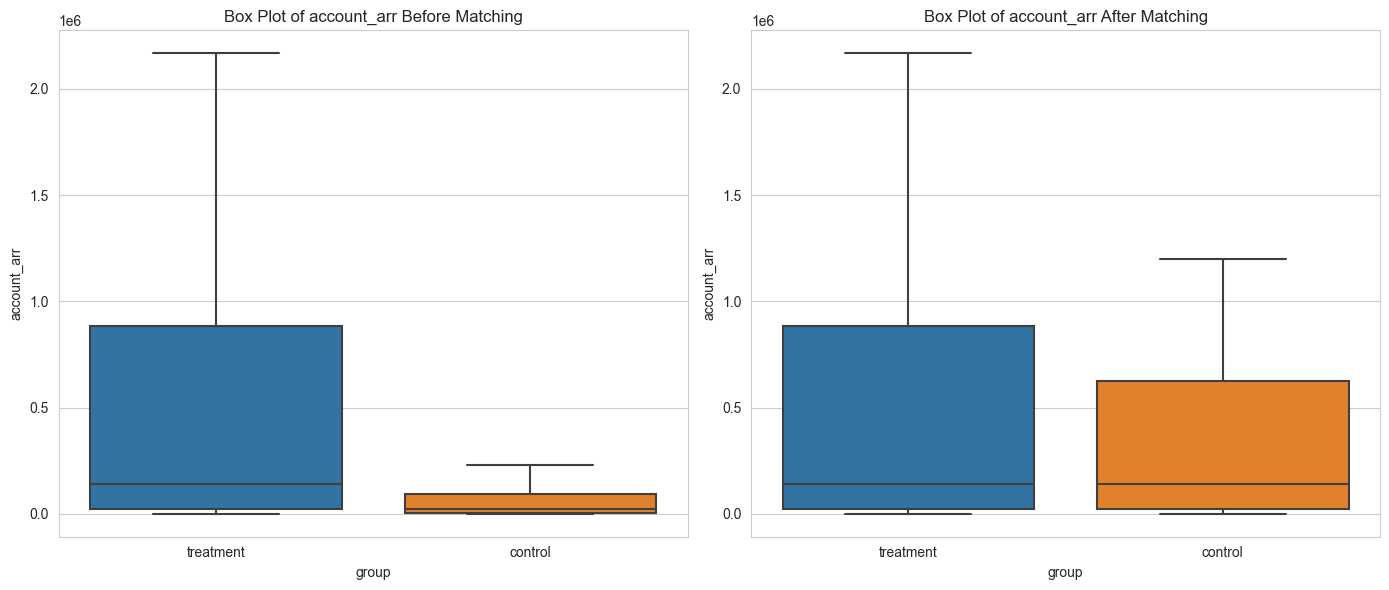

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the order of groups explicitly
group_order = ['treatment', 'control']

# Box plot for continuous variable before matching
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='account_arr', data=data, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr Before Matching')

# Box plot for continuous variable after matching
plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='account_arr', data=matched_pairs, showfliers=False, order=group_order)
plt.title('Box Plot of account_arr After Matching')

plt.tight_layout()
plt.show()


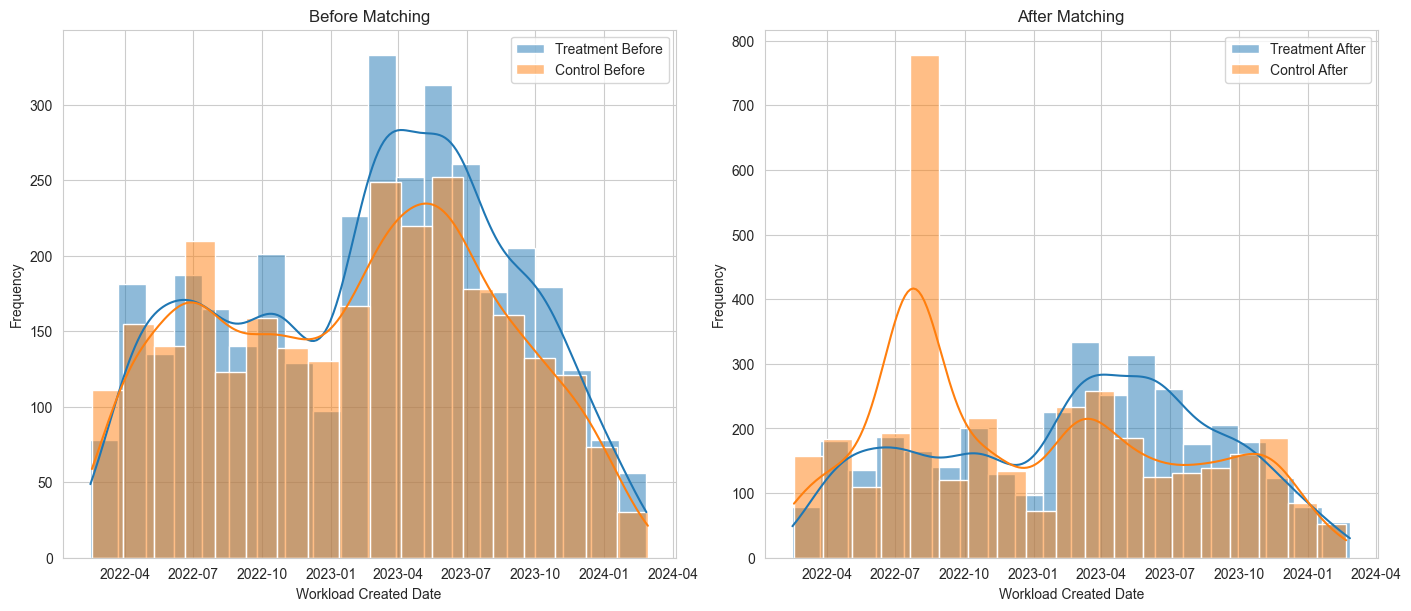

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined distributions with default colors
def plot_combined_distributions(data, combined_dataset):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True)
    
    # Plotting before matching
    sns.histplot(data[data['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[0], label='Treatment Before')
    sns.histplot(data[data['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[0], label='Control Before')
    axs[0].set_title('Before Matching')
    
    # Plotting after matching
    sns.histplot(matched_pairs[matched_pairs['ps_wl'] == 1]['workload_created_date'], kde=True, ax=axs[1], label='Treatment After')
    sns.histplot(matched_pairs[matched_pairs['ps_wl'] == 0]['workload_created_date'], kde=True, ax=axs[1], label='Control After')
    axs[1].set_title('After Matching')
    
    # Setting labels and legends for both plots
    for ax in axs:
        ax.set_xlabel('Workload Created Date')
        ax.set_ylabel('Frequency')
        ax.legend()

plot_combined_distributions(data, combined_dataset)
plt.show()


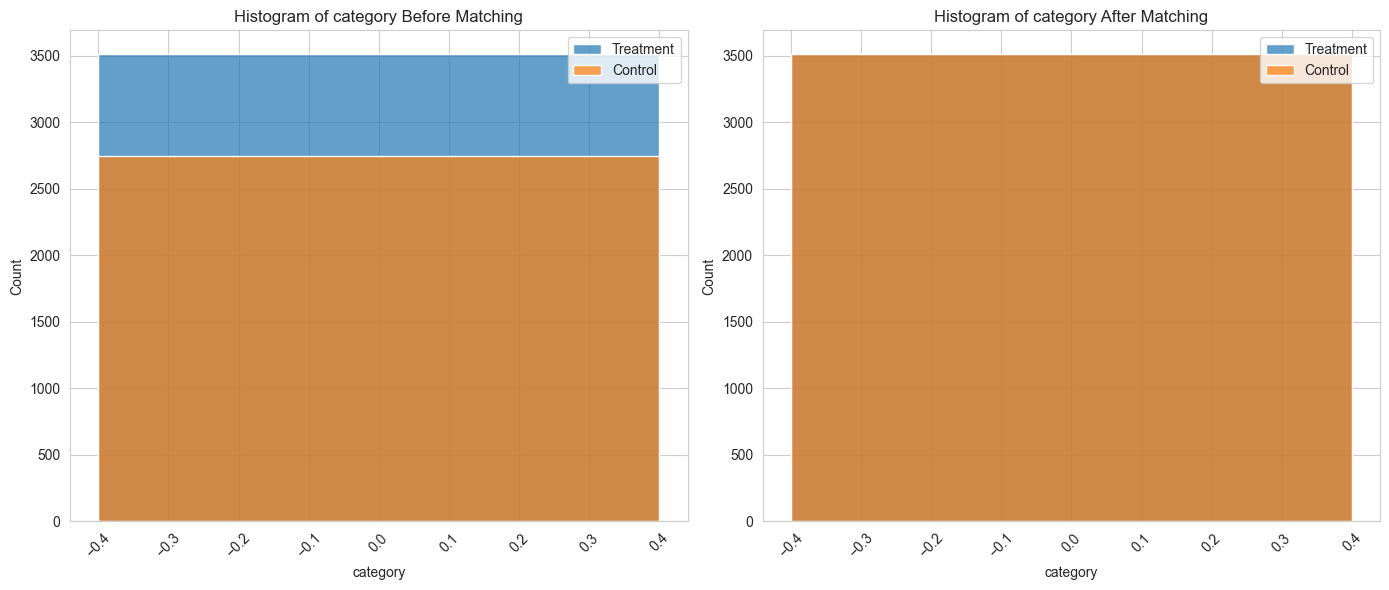

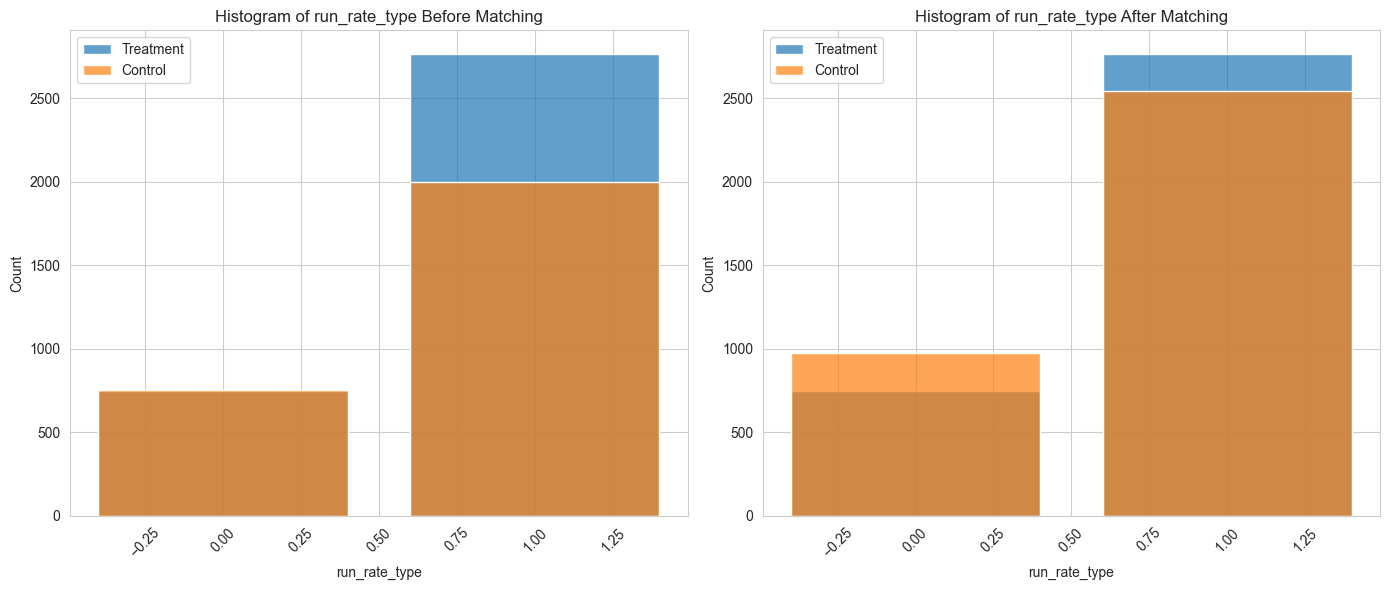

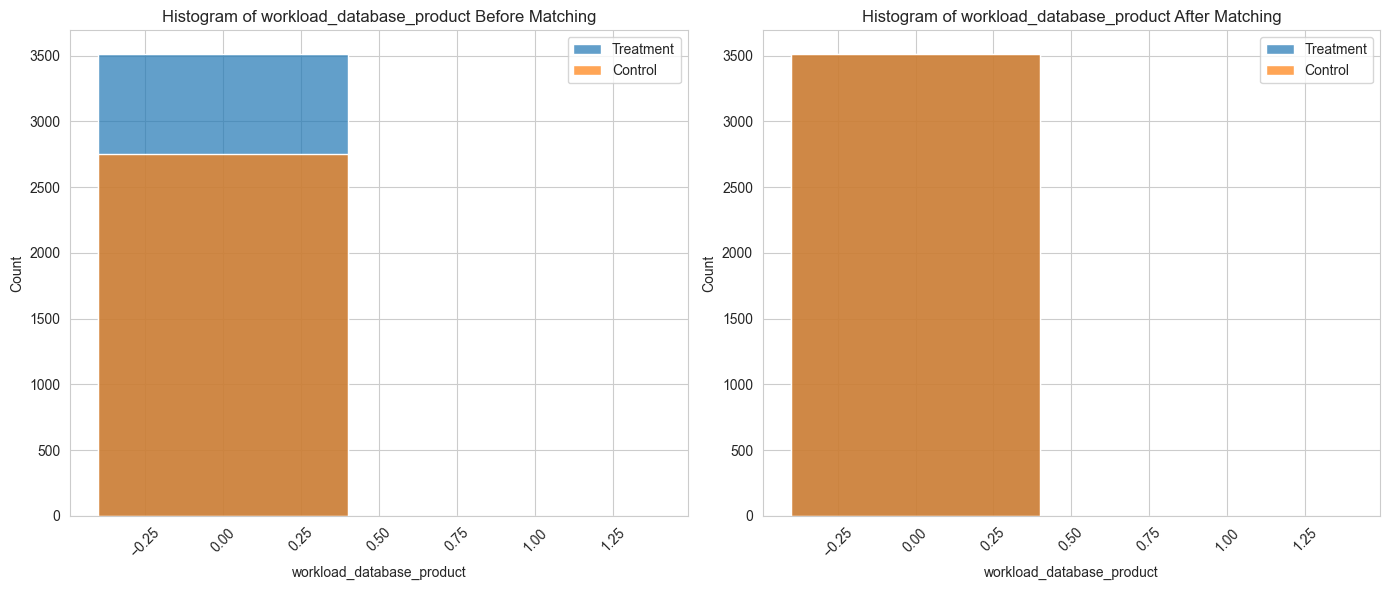

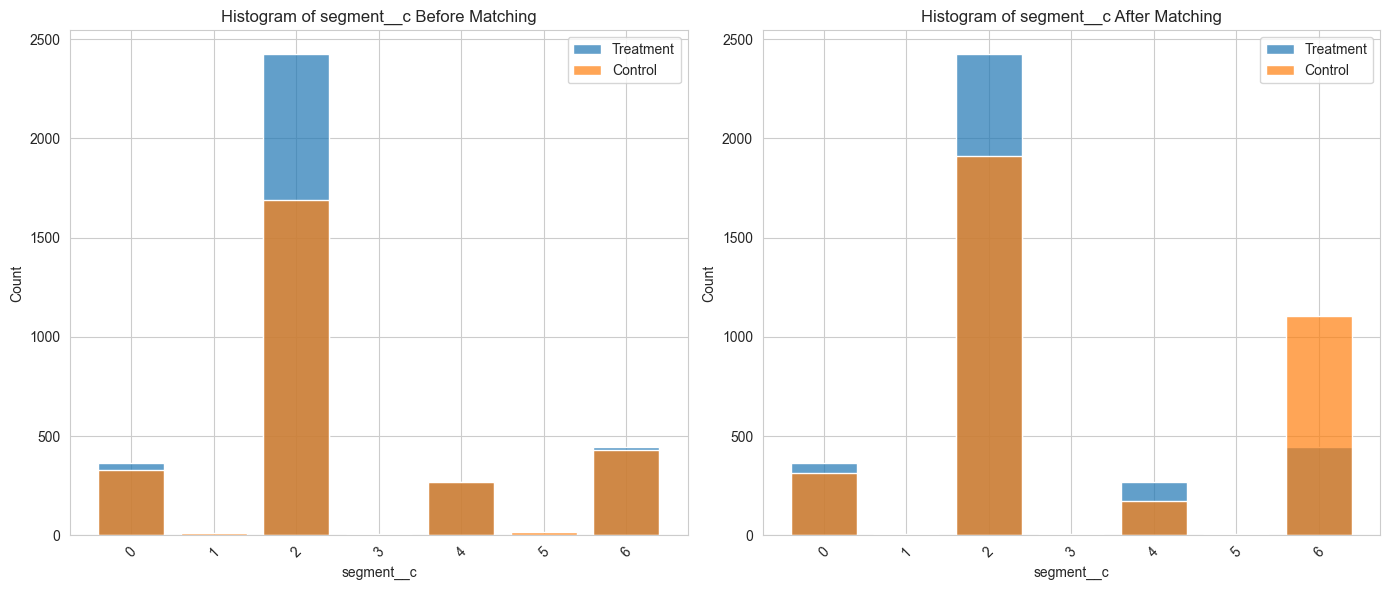

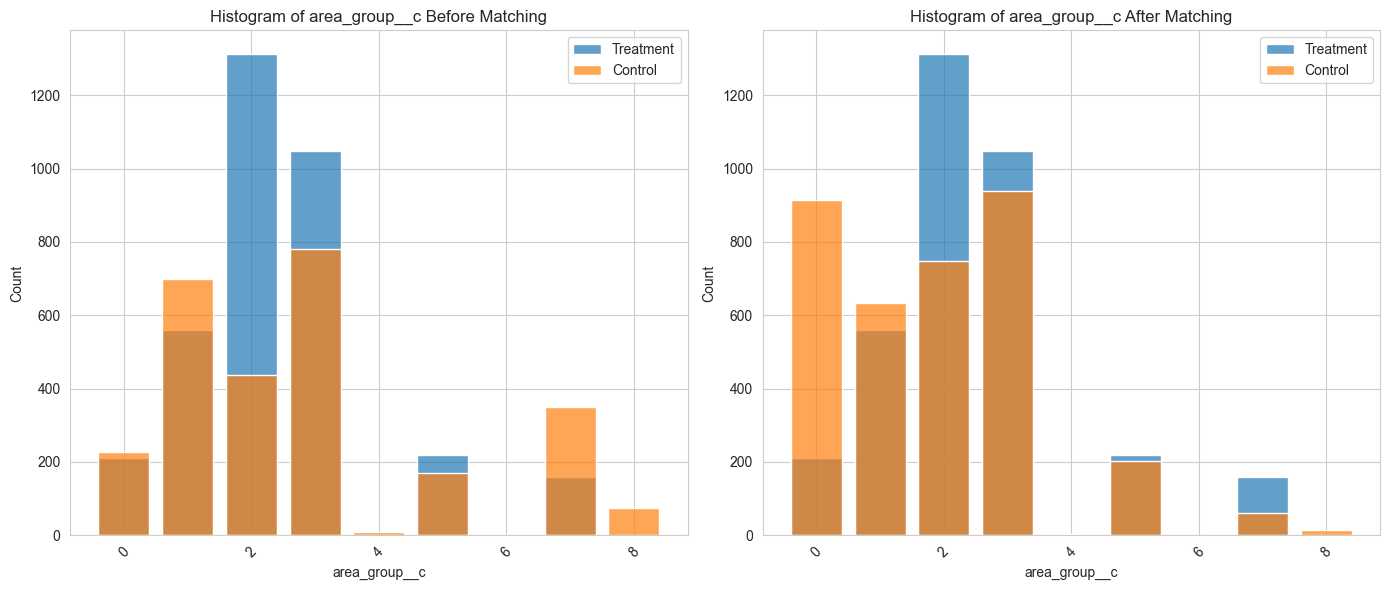

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set_style('whitegrid')

# Define the list of categorical variables for the demonstration
categorical_vars = ['category', 'run_rate_type', 'workload_database_product', 'segment__c', 'area_group__c']

# Create histograms for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(14, 6))

    # Before matching
    plt.subplot(1, 2, 1)
    sns.histplot(data=data[data['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(data=data[data['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} Before Matching')
    plt.xticks(rotation=45)
    plt.legend()

    # After matching
    plt.subplot(1, 2, 2)
    # Use matched_pairs here instead of combined_dataset
    sns.histplot(matched_pairs[matched_pairs['group'] == 'treatment'], x=var, label='Treatment', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    sns.histplot(matched_pairs[matched_pairs['group'] == 'control'], x=var, label='Control', kde=False, stat="count", discrete=True, shrink=0.8, alpha=0.7)
    plt.title(f'Histogram of {var} After Matching')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()
